In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Lineal multiple regression

Revisar datos meteorológicos de Szeged, Hungría y clasificar el tipo de variables. Observar distribuciones y revisar las variables colineales.

Posteriormente, se genera un modelo de regresión múltiple para estimar el valor de la humedad en función de la presión y temperatura H(P,T)

Luego, se evalua el desempeño del modelo ante datos faltantes
* Imputar media, mediana y valor más frecuente
* Eliminar un renglon de la matriz del modelo

Y, finalmente, se grafican las curvas de aprendizaje del modelo propuesto

## Input data

In [2]:
data = pd.read_csv("weatherHistory.csv")
n = len(data)

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# select data
feature_cols = ['Pressure (millibars)', 'Temperature (C)']
X = data[feature_cols] # Features
y = data.Humidity

## visualize data

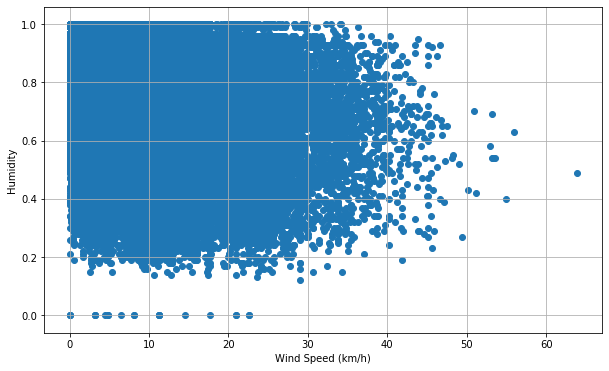

In [5]:
# relation between wind speed and humidity
feature_name = "Wind Speed (km/h)"
plt.figure(figsize=(10,6))
plt.scatter(data[feature_name],y)
plt.xlabel(feature_name)
plt.ylabel("Humidity")
plt.grid()

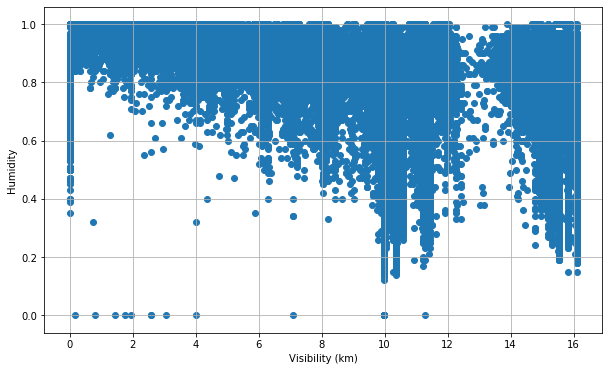

In [6]:
# relation between visibility and humidity
feature_name = "Visibility (km)"
plt.figure(figsize=(10,6))
plt.scatter(data[feature_name],y)
plt.xlabel(feature_name)
plt.ylabel("Humidity")
plt.grid()

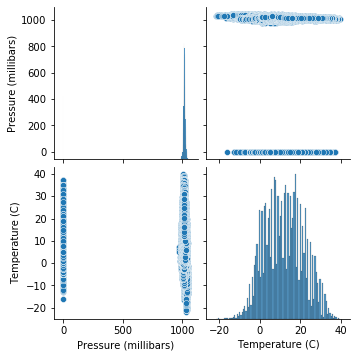

In [7]:
# selected features
sns.pairplot(X)

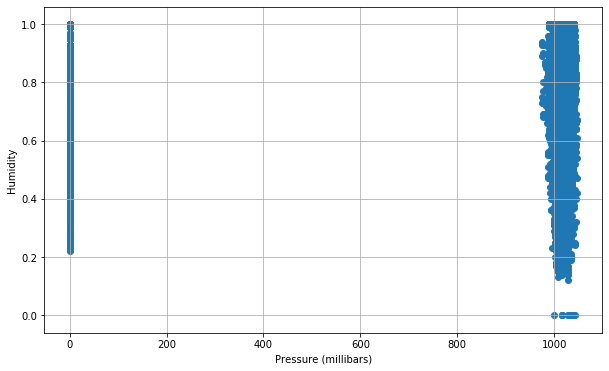

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X[feature_cols[0]],y)
plt.xlabel(feature_cols[0])
plt.ylabel("Humidity")
plt.grid()

### ¿Existe una relación entre la humedad y la temperatura?
En el siguiente gráfico se muestra una relación colineal inversa entre la temperatura y la humedad del ambiente. Sin embargo, una recta en el plano no bastaría para caracterizar adecuadamente la humedad a partir de únicamente la temperatura. Por tanto, es necesario utilizar más caracteristicas del conjunto de datos para llevar a cabo la aproximación de un modelo.

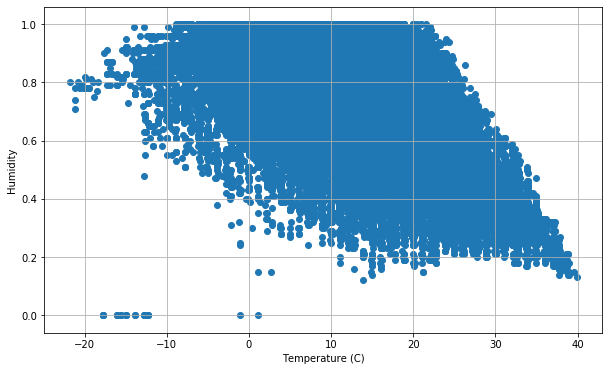

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[feature_cols[1]],y)
plt.xlabel(feature_cols[1])
plt.ylabel("Humidity")
plt.grid()

### ¿Existe una relación entre la humedad y la temperatura aparente?
En el siguiente gráfico se muestra una relación colineal inversa entre la temperatura aparente y la humedad del ambiente, muy parecido a la grafica anterior.

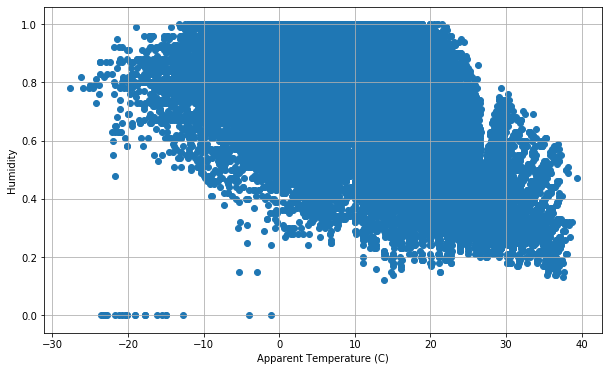

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(data['Apparent Temperature (C)'],y)
plt.xlabel("Apparent Temperature (C)")
plt.ylabel("Humidity")
plt.grid()

### ¿Es posible predecir la temeperatura aparente a partir de la humedad?
De acuerdo al gráfico anterior, es posible apreciar que ajustar un modelo de regresión lineal para aproximar la temperatura aparente a partir de la humedad tendrá una alta desviación estandar entre la recta y el valor real. Por tanto, un modelo que estime la temperatura aparente a partir de la humedad no resultaria práctico.

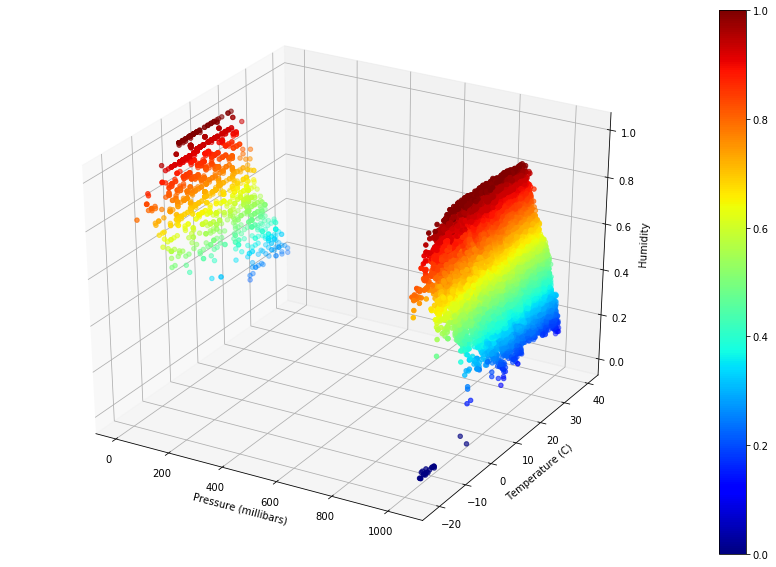

In [11]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[feature_cols[0]],X[feature_cols[1]],y,c=y,cmap="jet")
fig.colorbar(img)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])
ax.set_zlabel("Humidity")
plt.show()

## split dataset

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [13]:
len(X_train)

72339

In [14]:
len(X_test)

24114

## Perform linear multavariable regression

In [15]:
# sklearn model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [16]:
# train model minimum square error
x_b = np.c_[np.ones((len(X_train),1)),X_train[feature_cols[0]],X_train[feature_cols[1]]]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_train)

## make prediction using each model

In [17]:
# sklearn model
y_pred=lin_reg.predict(X_test)
y_pred

array([0.64451741, 0.57749204, 0.62965268, ..., 0.85573968, 0.7938103 ,
       0.8622047 ])

In [18]:
# minimum square error model
x_new_b = np.c_[np.ones((len(X_test),1)),X_test[feature_cols[0]],X_test[feature_cols[1]]]
y_predict = x_new_b.dot(theta_best)
y_predict

array([0.64451741, 0.57749204, 0.62965268, ..., 0.85573968, 0.7938103 ,
       0.8622047 ])

In [19]:
# accuracy model
print("Accuracy: ",lin_reg.score(X_test, y_test))

Accuracy:  0.402450291088997


## regression plane

In [20]:
# sklearn model
coefs = lin_reg.coef_
intercept = lin_reg.intercept_
x1s = np.outer(np.linspace(100,900,100),np.ones(100))
x2s = np.outer(np.linspace(-20,40,100), np.ones(100)).T # transpose
ys = coefs[0]*x1s + coefs[1]*x2s + intercept

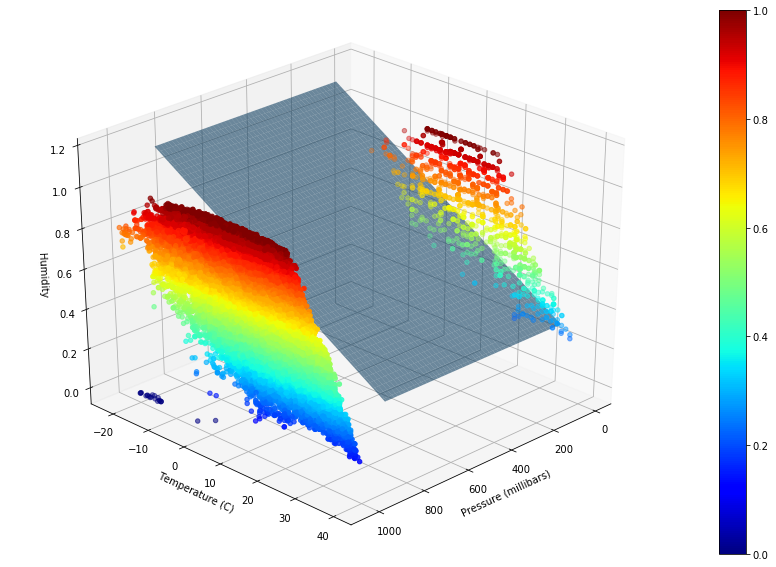

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[feature_cols[0]],X[feature_cols[1]],y,c=y,cmap="jet")
ax.plot_surface(x1s,x2s,ys,alpha=0.6)
fig.colorbar(img)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])
ax.set_zlabel("Humidity")
ax.view_init(30, 45)
plt.show()

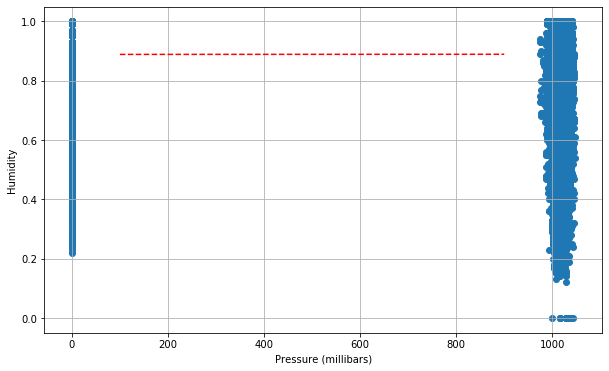

In [22]:
xr = np.linspace(100,900,100)
yr = coefs[0]*xr + intercept
plt.figure(figsize=(10,6))
plt.plot(xr,yr,"r--")
plt.scatter(X[feature_cols[0]],y)
plt.xlabel(feature_cols[0])
plt.ylabel("Humidity")
plt.grid()

Es posible observar que el modelo no es posible de ajustar una función que represente la humedad en función de la presión. De acuerdo al gráfico anterior, la humedad se presenta como una variable categórica respecto a la presión.

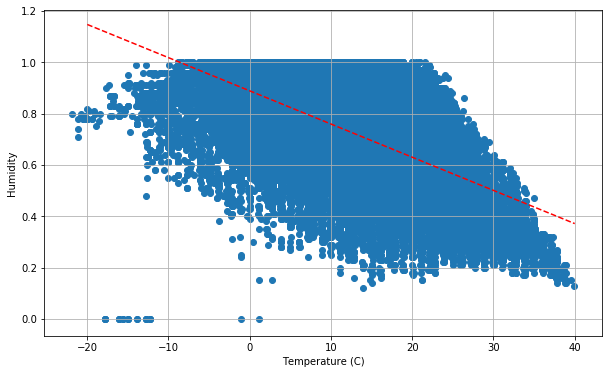

In [23]:
xr = np.linspace(-20,40,100)
yr = coefs[1]*xr + intercept
plt.figure(figsize=(10,6))
plt.plot(xr,yr,"r--")
plt.scatter(X[feature_cols[1]],y)
plt.xlabel(feature_cols[1])
plt.ylabel("Humidity")
plt.grid()

## training curve

In [24]:
train_sizes,train_scores,test_scores = learning_curve(LinearRegression(),X,y,scoring='neg_mean_squared_error',train_sizes=np.linspace(0.01,1,50))

In [25]:
# statistic results
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

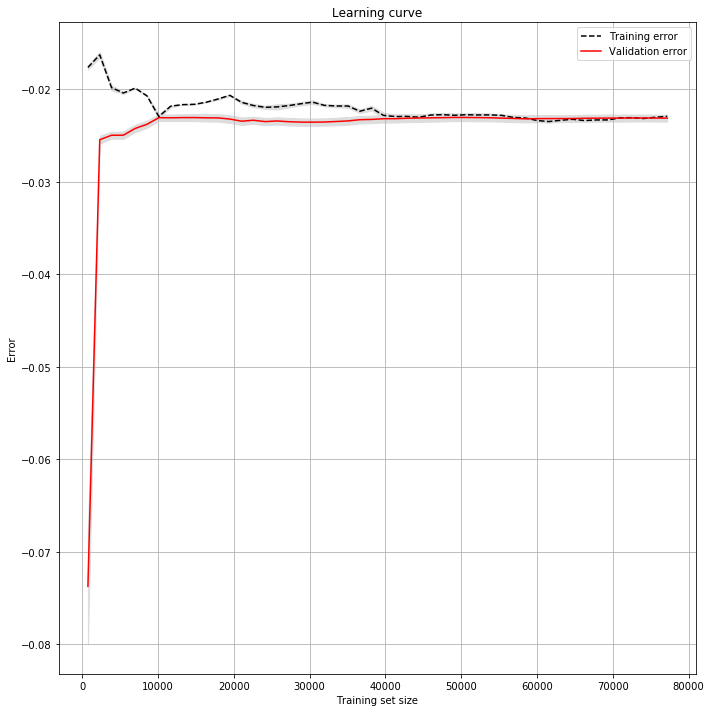

In [26]:
plt.subplots(1,figsize=(10,10))
# draw lines
plt.plot(train_sizes,train_mean,"--",color="black",label="Training error")
plt.plot(train_sizes,test_mean,color="red",label="Validation error")
# draw bands
plt.fill_between(train_sizes,train_mean-0.2*train_std,train_mean+0.2*train_std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-0.2*test_std,test_mean+0.2*test_std,color="#DDDDDD")
# create plot
plt.title("Learning curve")
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()

## Regression functions

In [32]:
# random data
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

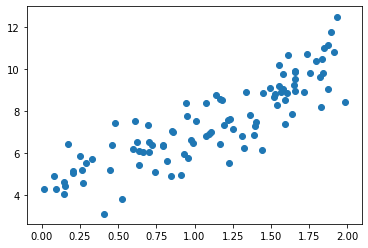

In [33]:
plt.scatter(x,y)

In [34]:
# train model minimum square error
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [35]:
# predict
x_new = np.array([[0],[2],[0.7]])
x_new_b = np.c_[np.ones((3,1)),x_new]
y_predict = x_new_b.dot(theta_best)

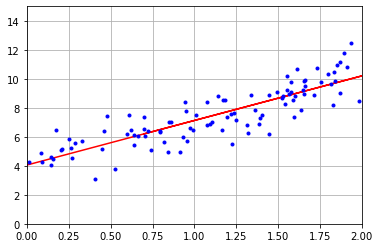

In [36]:
# plot result
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.grid()

## Using gradient descent

In [37]:
# parameters
eta = 0.5
n_iter = 50
m = 100

In [38]:
theta = np.random.rand(2,1)
y_predict = x_new_b.dot(theta)

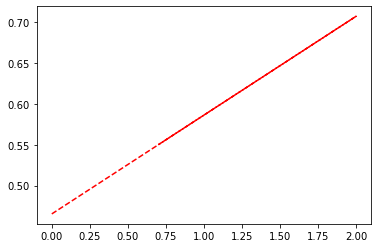

In [39]:
plt.plot(x_new,y_predict,"r--")

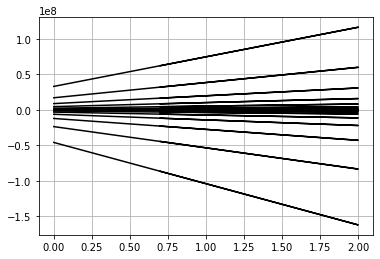

In [40]:
for i in range(n_iter):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta-eta*gradient
    y_predict = x_new_b.dot(theta)
    plt.plot(x_new,y_predict,"k-")
plt.grid()

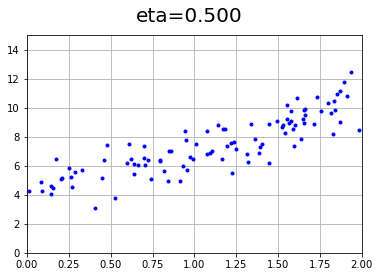

In [41]:
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.suptitle('eta=%1.3f'%eta,fontsize=20)
plt.grid()